<a href="https://colab.research.google.com/github/p-kaushal/Deep-Learning-GroupPorject-TeamJohnson/blob/main/MMAI894_Covid19__Pranav_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Read the File**

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Apr  3 19:35:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
import pandas as pd
#from keras.applications import vgg16
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Dropout, Layer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image, display
import matplotlib.cm as cm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/TeamProject")
!cp COVID-19-Dataset.zip /content/sample_data
os.chdir("/content/sample_data")
!unzip COVID-19-Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19 Dataset/X-ray/Non-COVID/01.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/010.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0100.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0101.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0102.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0103.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0104.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0105.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0106.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0107.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0108.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0109.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/011.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0110.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0111.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0112.jpeg  
  inflating: COVID-19 Dat

In [5]:
my_data="/content/sample_data/COVID-19 Dataset/X-ray"

In [6]:
covid_dir=os.path.join(my_data,os.listdir(my_data)[1])
noncovid_dir=os.path.join(my_data,os.listdir(my_data)[0])

In [7]:
covid_dir

'/content/sample_data/COVID-19 Dataset/X-ray/COVID'

In [8]:
#!pip install opencv-contrib-python
# Saving Non covid image to data list.
# Changing Color Channels.
# Resizing image to be fixed (224 X 224) pixels.
data=[]
labels=[]
for r,d,f in os.walk(noncovid_dir):
  for file in f:
    label=0
    labels.append(label)
    image = cv2.imread(os.path.join(noncovid_dir,file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)

In [9]:
# Saving covid image to data list.
# Changing Color Channels.
# Resizing image to be fixed (224 X 224) pixels.
for r,d,f in os.walk(covid_dir):
  for file in f:
    label=1
    labels.append(label)
    image=cv2.imread(os.path.join(covid_dir,file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)

In [10]:
print(len(data))
print(len(labels))

9544
9544


In [11]:
labels = np.array(labels)

In [12]:
data = np.array(data,dtype=np.float32)/255

In [13]:
labels =keras.utils.to_categorical(labels)

In [14]:
(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels,
                                                  test_size=0.2,
                                                  # stratify=labels,
                                                  random_state=42,
                                                  shuffle=True
                                                  )

In [15]:
print("Length of TrainX:" ,len(trainX))
print("Length of TestX:" ,len(testX))
print("Length of TrainY:" ,len(trainY))
print("Length of TestY:" ,len(testY))

Length of TrainX: 7635
Length of TestX: 1909
Length of TrainY: 7635
Length of TestY: 1909


In [16]:
print(trainX[0].shape)
print(trainY[0].shape)

(224, 224, 3)
(2,)


# **Data Augmentation**

In [17]:
#augmentation = keras.preprocessing.image.ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# **Model Build/Train/Fit**

**Base Model DenseNet121****(non trainable layers)

In [18]:
baseModel=keras.applications.DenseNet121(input_shape=(224,224,3),
                      include_top=False,
                      weights='imagenet')

for layer in baseModel.layers:
    layer.trainable = False

baseModel.summary()


29089792/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

## Model Training  **Gridsearch**

In [19]:
# Function to create model, required for KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#def create_model():
  # create model
def getModel(optimizer):

    baseModel=keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

    for layer in baseModel.layers:
      layer.trainable = False

    headModel = baseModel.output
    headModel = tf.keras.layers.Conv2D(filters=128,activation="relu",kernel_size=2)(headModel) #sigmoid/tanh/relu
    headModel = tf.keras.layers.MaxPooling2D(pool_size=2)(headModel)
    headModel = tf.keras.layers.Flatten(name="flatten")(headModel)
    headModel = Dense(2, activation="softmax")(headModel)

    model = keras.Model(inputs=baseModel.input, outputs=headModel)
    
    model.compile(optimizer=optimizer , loss = tf.losses.binary_crossentropy,metrics=["accuracy",keras.metrics.Precision(),keras.metrics.AUC()])
    model.evaluate(testX,testY,return_dict=True)
    
    return model

optimizer = ['SGD', 'Adam']
epochs = [5, 10]

param_grid = dict(optimizer=optimizer)

Kmodel = KerasClassifier(build_fn=getModel, verbose=1)
grid = GridSearchCV(estimator=Kmodel, param_grid=param_grid,cv=5)
grid_result = grid.fit(trainX, trainY)

239/239 [==============================] - 15s 42ms/step - loss: 0.3256 - accuracy: 0.8748 - precision_10: 0.8748 - auc_10: 0.9390


#**Model Evaluation**

In [20]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.906221 using {'optimizer': 'Adam'}
0.861559 (0.023607) with: {'optimizer': 'SGD'}
0.906221 (0.017398) with: {'optimizer': 'Adam'}


In [21]:
pred_Y = getModel(optimizer).predict(testX)
print('Confusion Matrix')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

60/60 [==============================] - 5s 38ms/step - loss: 0.9569 - accuracy: 0.4432 - precision_11: 0.4432 - auc_11: 0.4511
Confusion Matrix


              precision    recall  f1-score   support

           0       0.58      0.15      0.24      1126
           1       0.41      0.85      0.55       783

    accuracy                           0.44      1909
   macro avg       0.50      0.50      0.39      1909
weighted avg       0.51      0.44      0.37      1909



# **HeatMap**

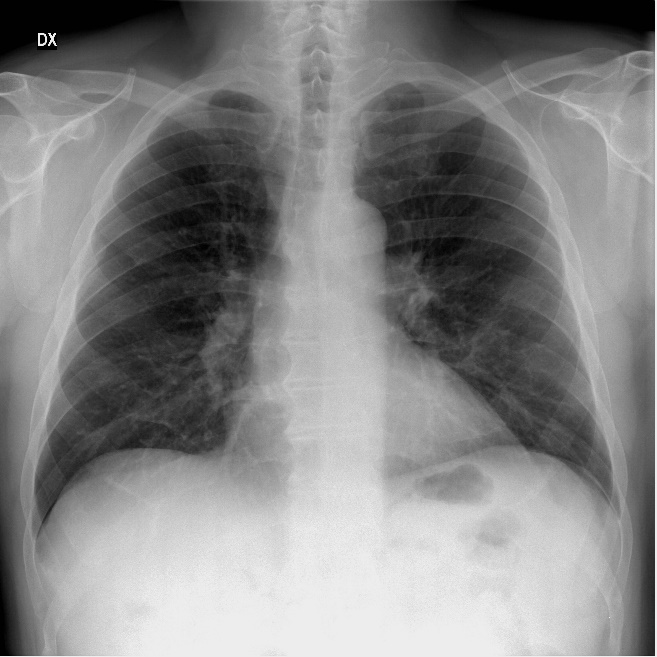

In [22]:
# model_builder = keras.applications.xception.Xception
img_size = (224, 224)

preprocess_input = tf.keras.applications.densenet.preprocess_input
decode_predictions = tf.keras.applications.densenet.decode_predictions

last_conv_layer_name = "MaxPooling2D"

# The local path to our target image
img_path = '/content/sample_data/COVID-19 Dataset/X-ray/COVID/0107.jpeg'

display(Image(img_path))

In [23]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
  
    array = np.expand_dims(array, axis=0)
    return array

In [24]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [25]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))
optimizer = 'Adam'
# Make model
# model = model_builder(weights="imagenet")
model = getModel(optimizer)
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = getModel(optimizer).predict(img_array)
# print("Predicted:", decode_predictions(preds)[0])


60/60 [==============================] - 5s 38ms/step - loss: 0.9857 - accuracy: 0.4657 - precision_13: 0.4657 - auc_13: 0.4799


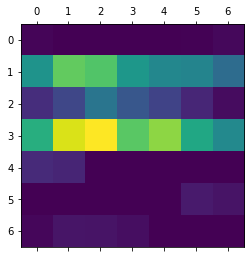

In [26]:
# # Generate class activation heatmap

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.show()


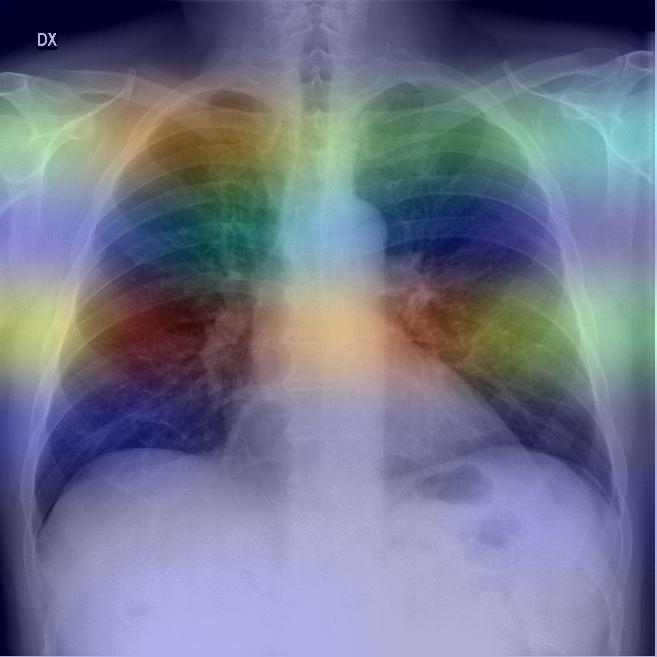

In [27]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)